In [55]:

"""
Auther: Suresh
email: suresh@cogknit.com
"""
import cv2,time
class _video_reader(object):
    def __init__(self, video_file):
        self.video_file = video_file

    def __enter__(self):
        cap = cv2.VideoCapture(self.video_file)
        ret, frame = cap.read()  # can you read the source ?
        assert ret == True, "Video read error {}".format(self.video_file)
        #cap.set(1, 0)  # set it back to read first frame
        self.cap = cap
        return cap

    def __exit__(self, type, value, traceback):
        ''' TODO: Something intelligent if error occurs '''
        self.cap.release()
        return


class VideoObject(object):

    def __init__(self, video_file):
        self.file_path = video_file
        self.cap = cv2.VideoCapture(self.file_path)

    def get_frames(self, F=None):
        '''
        Get frames of a video one after the other as a list(generator)
        '''
        ret, frame = self.cap.read()
        while ret:
            yield F(frame) if F else frame
            ret, frame = cap.read()

    def pull_frames(self, frame_numbers=[], F=None):
        '''
        Get some specific frames of the video as a list(generator)
        '''
        for frame_number in frame_numbers:
            self.cap.set(1, frame_number)
            ret, frame = self.cap.read()
            if ret:
                yield F(frame) if F else frame


    @property
    def fps(self):

        fps = self.cap.get(cv2.CAP_PROP_FPS)
        self.cap.release()
        return fps

    @property
    def width(self):
        fps = self.cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        self.cap.release()
        return fps

    @property
    def height(self):
        fps = self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
        self.cap.release()
        return fps

    @property
    def length(self):
        f_count = self.cap.get(cv2.CAP_PROP_FRAME_COUNT)
        self.cap.release()
        return int(f_count)

    def __len__(self):
        return self.length






1


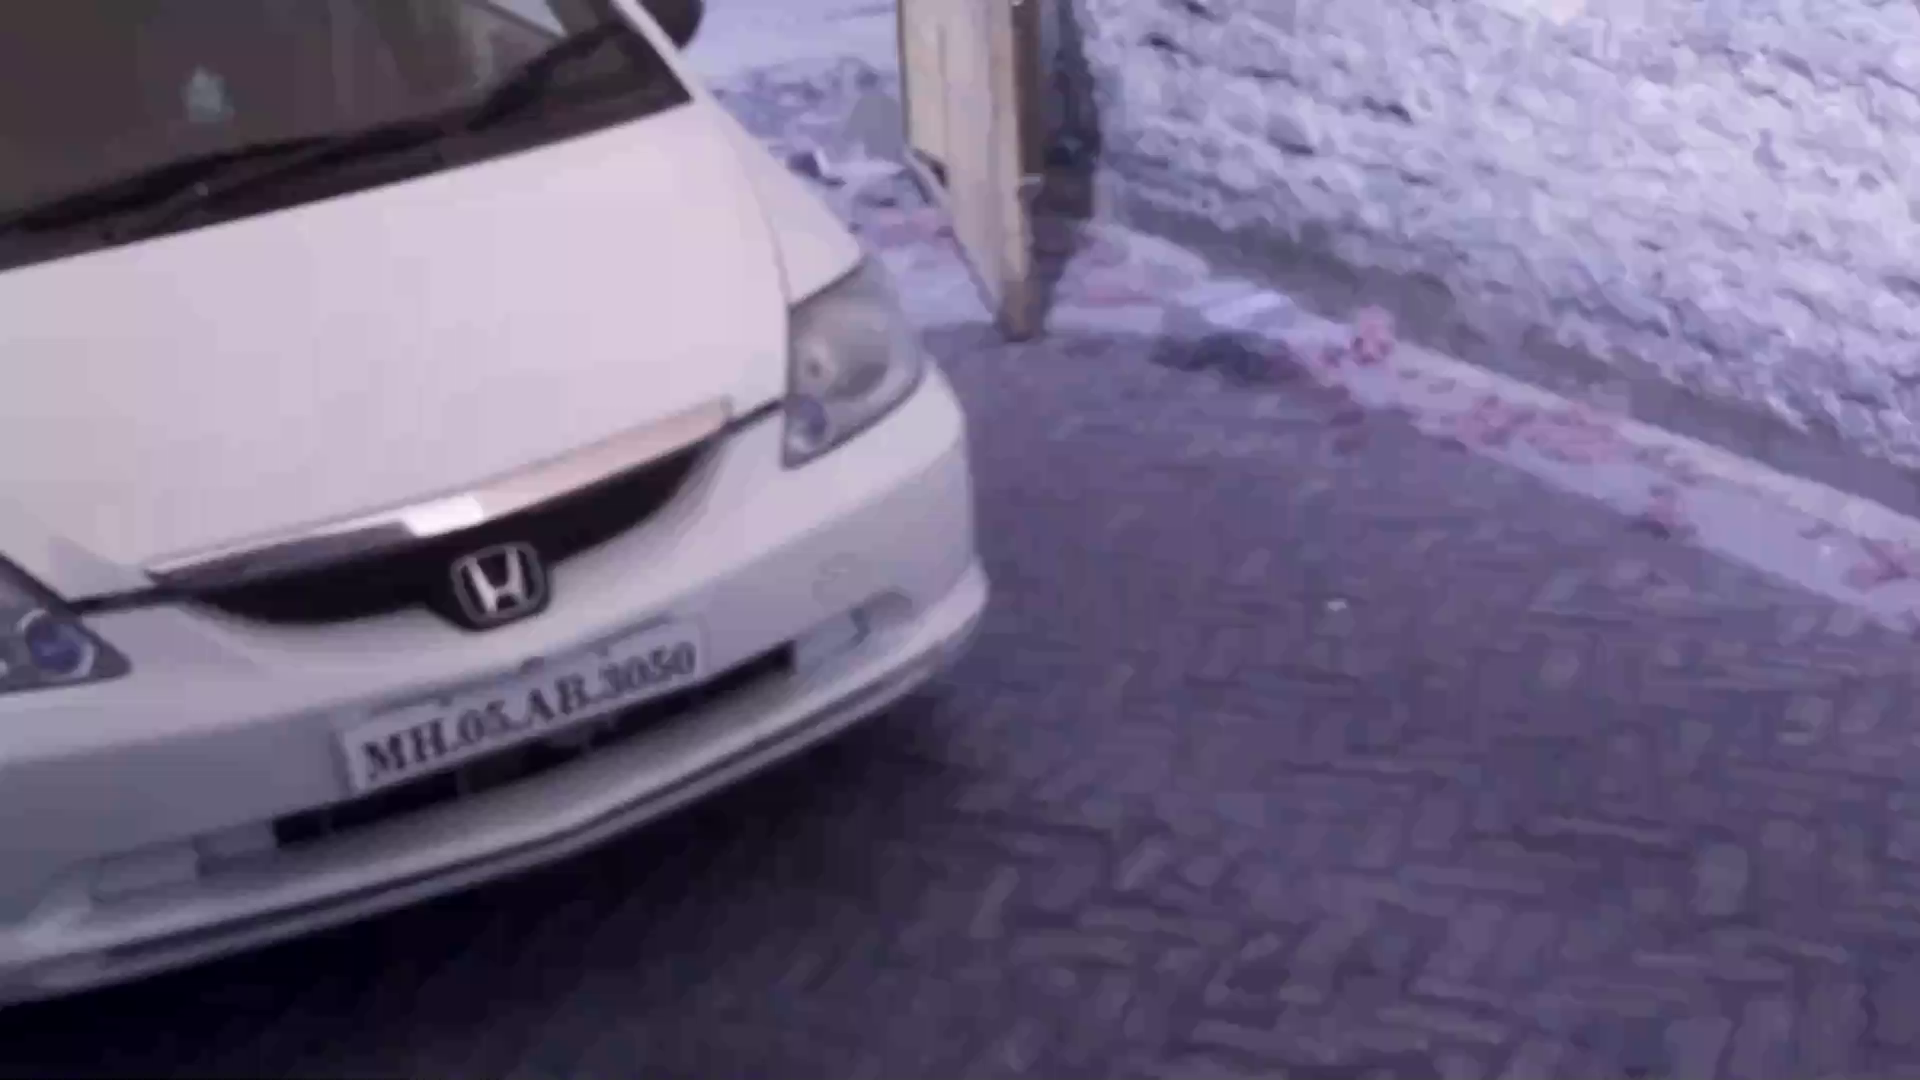

In [57]:
#path = "/home/cogknit/Documents/acc_apigateway/media/uploaded_media/9488b5fb6314462da43e8e0ac9063ae1.mkv"
path="/home/gpu-machine/projects/rnpd/media/uploaded_media/9067254bb410448c8dbeed6f723e48b8.h264"
vid = VideoObject(path)

listss = list(vid.pull_frames([45]))
print(len(lists))
Image.fromarray(listss[0])

In [35]:
from PIL import Image
from io import BytesIO
import base64,time,requests,json
start_time=time.time()

#path = "/home/cogknit/Documents/acc_apigateway/media/uploaded_media/9488b5fb6314462da43e8e0ac9063ae1.mkv"
path="/home/gpu-machine/projects/rnpd/media/sample_media/1.h264"
vid = VideoObject(path)
lists = list(vid.pull_frames([34]))
print("lenth: ",len(lists))
end_time=time.time()
fprocess_time=str(end_time-start_time)
print("Process time Extracting a frame ",fprocess_time)
for i in lists:
    s_time=time.time()
    buff = BytesIO()
    Image.fromarray(i).save(buff, format='png')
    base64_bytes = base64.b64encode(buff.getvalue())
    base64_string = base64_bytes.decode('utf-8')
    payload = {'url': base64_string}
    headers = {'Content-type': 'application/json'}
    e_time=time.time()
    b_process_time=str(e_time-s_time)
    print("Base Extracting a frame ",b_process_time)
    ob_start_time=time.time()
    #r=requests.post("http://35.185.66.242:5006/",data=json.dumps(payload),headers=headers)
    #r=requests.post("http://localhost:5006/",data=json.dumps(payload),headers=headers)
    #r=requests.post("http://35.185.66.242:5010/",data=json.dumps(payload),headers=headers)
    ob_end_time=time.time()
    b_process_time=str(ob_end_time-ob_start_time)
#     print("data: ",r.json())
    print("Object detection process time ",b_process_time)
  

lenth:  1
Process time Extracting a frame  0.07159852981567383
Base Extracting a frame  0.28150010108947754
Object detection process time  7.152557373046875e-07


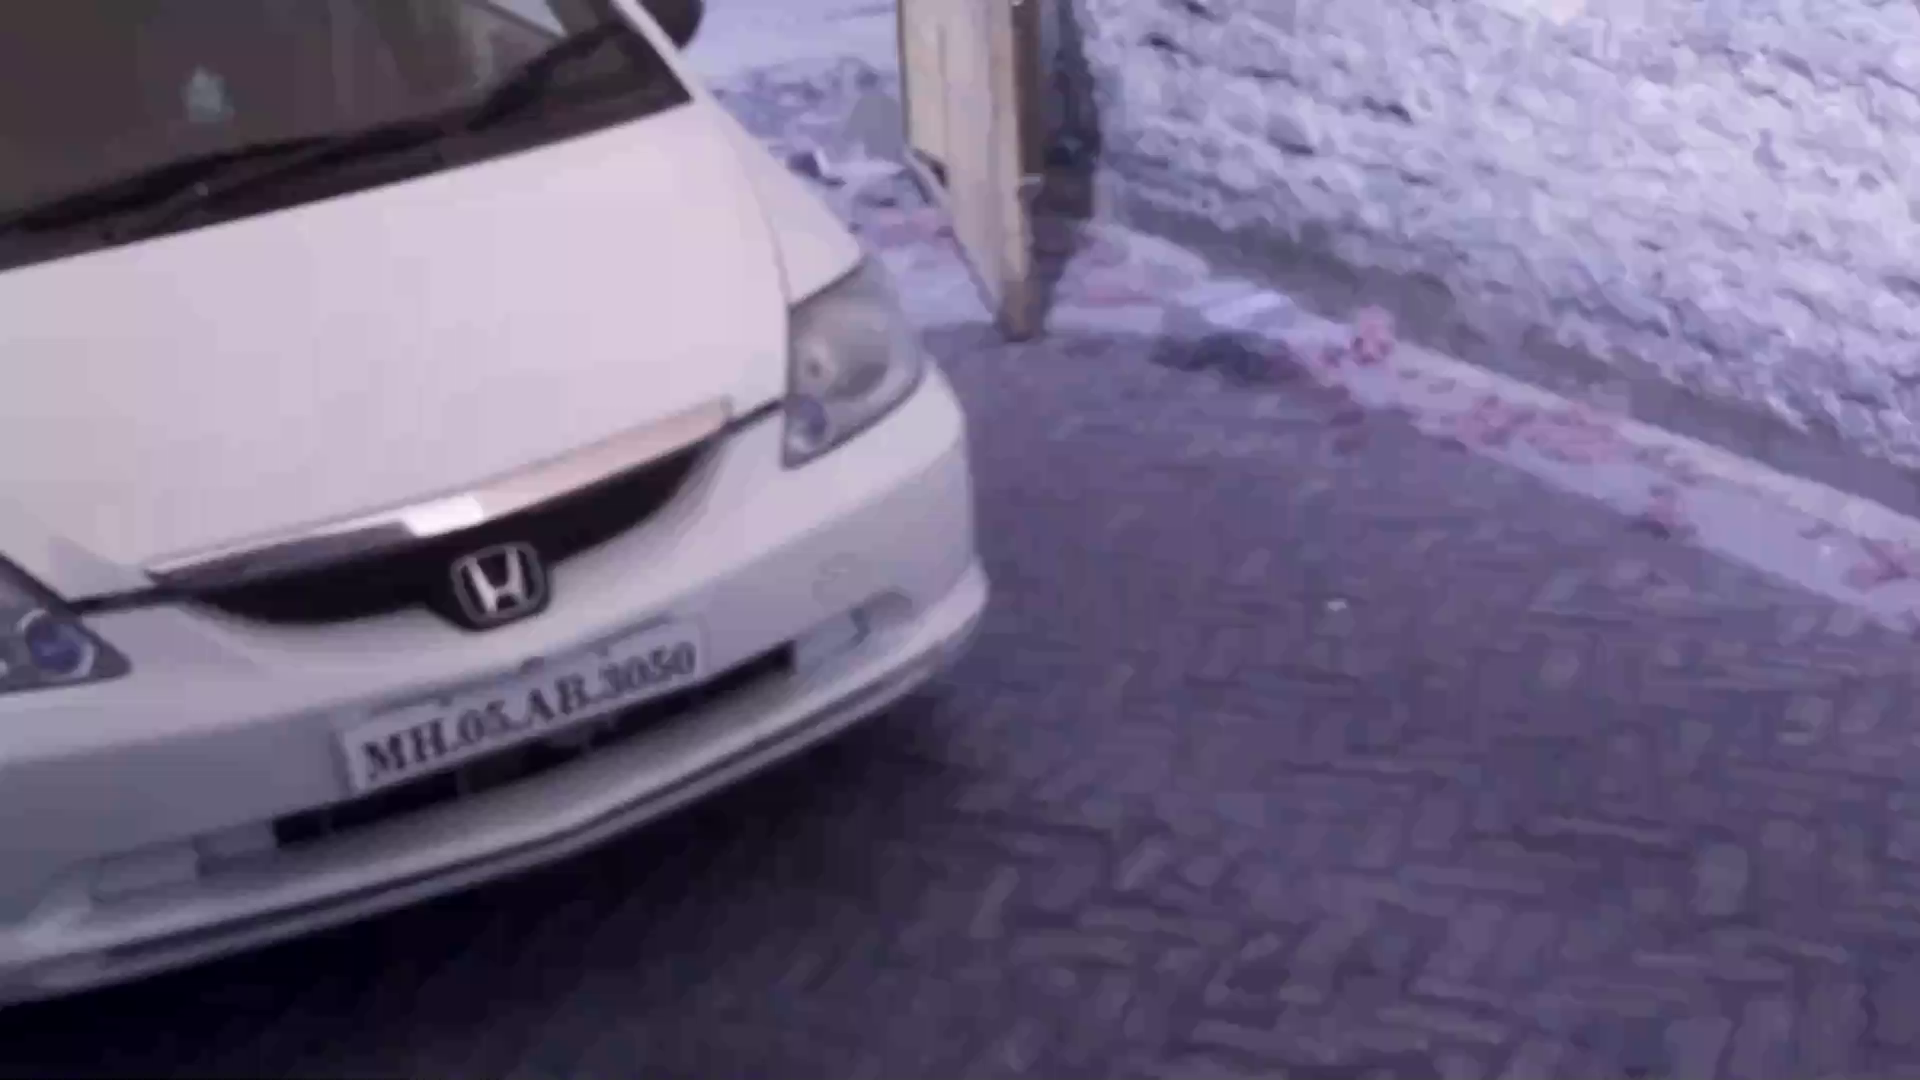

In [48]:
W,H,_ = lists[0].shape
# x= int(0.483333333333*W)
# y = int(0.1515625*H)
# w =int(0.6416666666*W)
# h = int(0.36171875*H)
Image.fromarray(lists[0])

NameError: name 'VideoObject' is not defined

In [ ]:
from PIL import Image
from io import BytesIO
import base64,time,requests,json
for i in lists:
    buff = BytesIO()
    Image.fromarray(i).save(buff, format='png')
    base64_bytes = base64.b64encode(buff.getvalue())
    base64_string = base64_bytes.decode('utf-8')
    payload = {'url': base64_string}
    headers = {'Content-type': 'application/json'}
    r=requests.post("http://35.185.66.242:5001/",data=json.dumps(payload),headers=headers)
    print(r.text,end=' ')


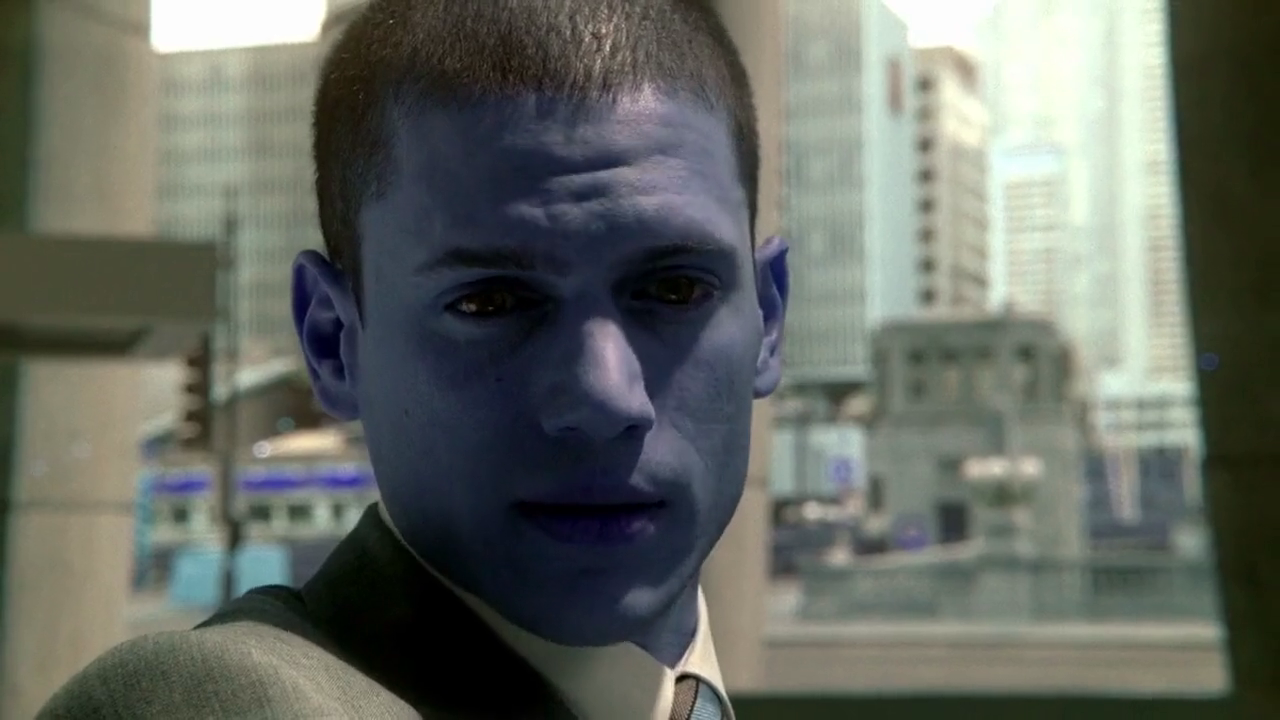

In [13]:
path = "/home/cogknit/Documents/acc_apigateway/media/uploaded_media/9488b5fb6314462da43e8e0ac9063ae1.mkv"
vid = VideoObject(path)
frame = list(vid.pull_frames([100]))[0]
Image.fromarray(frame)

# Testing code by nd

In [5]:
import cv2,time
class _video_reader(object):
    def __init__(self, video_file):
        self.video_file = video_file

    def __enter__(self):
        cap = cv2.VideoCapture(self.video_file)
        ret, frame = cap.read()  # can you read the source ?
        assert ret == True, "Video read error {}".format(self.video_file)
        cap.set(1, 0)  # set it back to read first frame
        self.cap = cap
        return cap

    def __exit__(self, type, value, traceback):
        ''' TODO: Something intelligent if error occurs '''
        self.cap.release()
        return


class VideoObject(object):
    def __init__(self, video_file):
        self.file_path = video_file

    def get_frames(self, F=None):
        '''
        Get frames of a video one after the other as a list(generator)
        '''
        with _video_reader(self.file_path) as cap:
            ret, frame = cap.read()
            while ret:
                yield F(frame) if F else frame
                ret, frame = cap.read()

    def pull_frames(self, frame_numbers=[], F=None):
        '''
        Get some specific frames of the video as a list(generator)
        '''
        with _video_reader(self.file_path) as cap:
            for frame_number in frame_numbers:
                cap.set(1, frame_number)
                ret, frame = cap.read()
                if ret:
                    yield F(frame) if F else frame

    @property
    def fps(self):
        with _video_reader(self.file_path) as cap:
            fps = cap.get(cv2.CAP_PROP_FPS)
            return fps

    @property
    def width(self):
        with _video_reader(self.file_path) as cap:
            fps = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
            return fps

    @property
    def height(self):
        with _video_reader(self.file_path) as cap:
            fps = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
            return fps

    @property
    def length(self):
        # total no of frames
        with _video_reader(self.file_path) as cap:
            f_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
            return int(f_count)

    def __len__(self):
        return self.length






In [6]:
video_path = "/home/cogknit/Documents/acc_apigateway/media/uploaded_media/9488b5fb6314462da43e8e0ac9063ae1.mkv"
video = VideoObject(video_path)
FRAMES = list(video.pull_frames(range(100)))

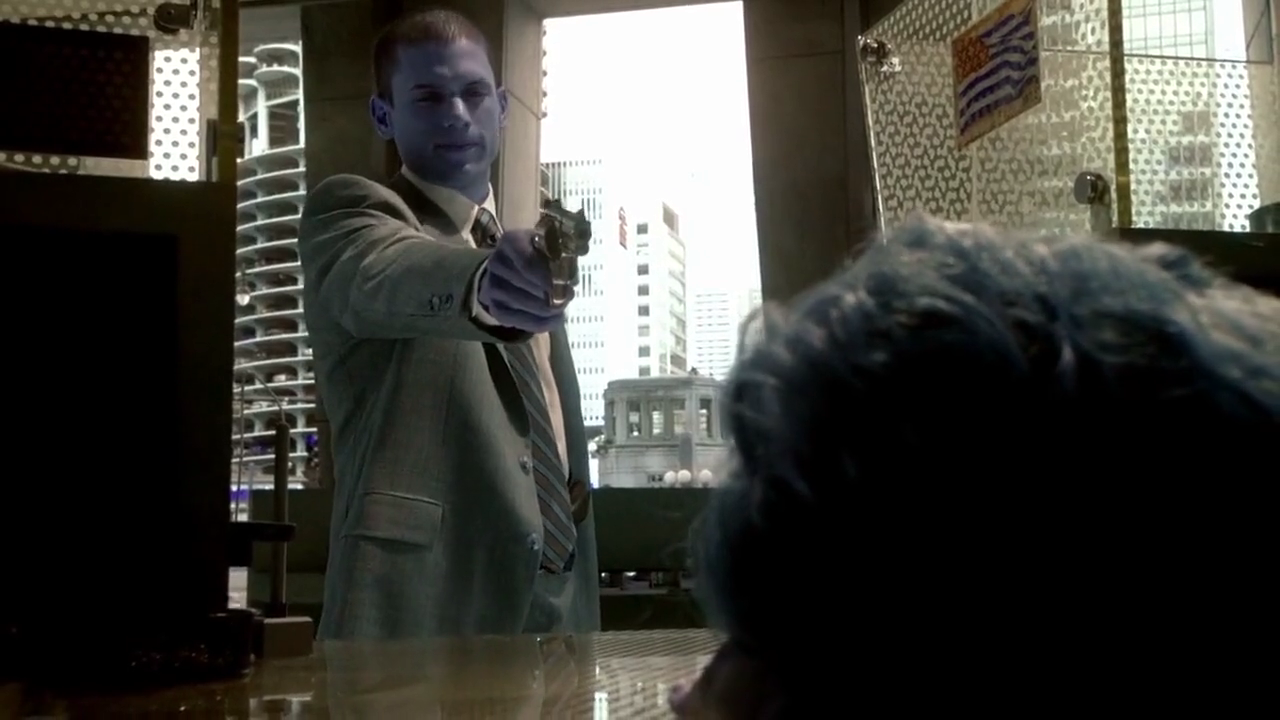

In [57]:
Image.fromarray(FRAMES[30])

In [7]:
from io import BytesIO
from PIL import Image
import base64, json
import requests


def call_api(frame, api="gender"):
    buff = BytesIO()
    Image.fromarray(frame).save(buff, format='png')
    base64_bytes = base64.b64encode(buff.getvalue())
    base64_string = base64_bytes.decode('utf-8')
    payload = {'url': base64_string}
    headers = {'Content-type': 'application/json'}
    if api == "gender":
        r=requests.post("http://35.185.66.242:5010/",data=json.dumps(payload),headers=headers)
    
    if api == "object":
        r=requests.post("http://35.185.66.242:5001/",data=json.dumps(payload),headers=headers)
#     r=requests.post("http://localhost:5006/",data=json.dumps(payload),headers=headers)
    D = json.loads(r.text)
    return D




In [8]:
frame = FRAMES[20]
frame = frame.copy()
# D = call_api(frame, api="gender")

In [150]:
vis.shape

(720, 1280, 3)

In [152]:
D_gender  = call_api(frame, api="gender")
D_object  = call_api(frame, api="object")

[{'y_position': 0.07361111111111111, 'gender': 'male', 'confidence': '0.9632399', 'width': 0.10078125, 'x_position': 0.2984375, 'height': 0.17916666666666667}]


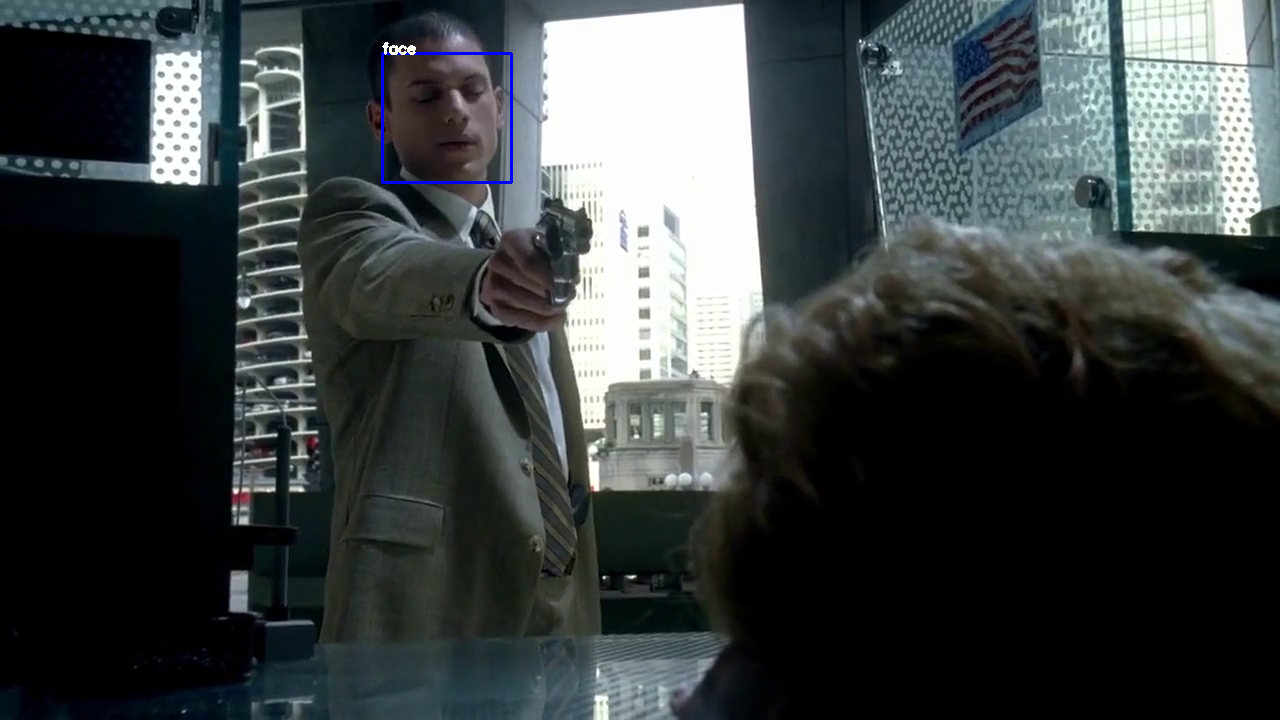

In [15]:
D_gender  = call_api(frame, api="gender")
#D_object  = call_api(frame, api="object")

vis = frame.copy()
H,W,_ = vis.shape

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 0.5
fontColor              = (255,255,255)
lineType               = 2
#  cv2.putText(vis,'Hello World!',     (x1,y1),     font,     fontScale,    fontColor,    lineType)
print(D_gender)


for d in D_gender:
    x,y,w,h = float(d['x_position']),float(d['y_position']),float(d['width']),float(d['height'])
    x,y,w,h =x,y,w,h
    x1 = int(x*W)
    y1 = int(y*H)
    x2 = int((x+w)*W)
    y2 = int((y+h)*H)
    cv2.rectangle(vis, (x1, y1), (x2, y2), (255,0,0), 2)
    cv2.putText(vis,"face", (x1,y1),     font,     fontScale,    fontColor,    lineType)


    
# for d in D_object:
#     x,y,w,h = float(d['x_position']),float(d['y_position']),float(d['width']),float(d['height'])
#     x,y,w,h =x,y,w,h
#     x1 = int(x*W)
#     y1 = int(y*H)
#     x2 = int((x+w)*W)
#     y2 = int((y+h)*H)
#     cv2.rectangle(vis, (x1, y1), (x2, y2), (255,255,0), 2)
#     cv2.rectangle(vis, (x1, y1-10), (x2, y2), (255,0,0), 2)
#     cv2.putText(vis,d['class'],     (x1,y1+10),     font,     fontScale,    fontColor,    lineType)


vis = vis[:,:,[2,1,0]]
Image.fromarray(vis)

In [159]:

for d in D_object:
    ymin, xmin, ymax, xmax = float(d['x_position']),float(d['y_position']),float(d['width']),float(d['height'])
#     x,y,w,h = 
#     x,y,w,h = y,x,h,w
    ymin, xmin, ymax, xmax = ymin*H, xmin*W, ymax*H, xmax*W
    x1 = int(xmin)
    y1 = int(ymin)
    x2 = int(xmax)
    y2 = int(ymax)
    cv2.rectangle(vis, (x1, y1), (x2, y2), (255,255,0), 2)
    cv2.rectangle(vis, (x1, y1-10), (x2, y2), (255,0,0), 2)
    cv2.putText(vis,d['class'],     (x1,y1+10),     font,     fontScale,    fontColor,    lineType)


    

TypeError: Layout of the output array img is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

In [19]:
import os
#folder = 'frame_21'
#os.mkdir(folder)
# use opencv to do the job
import cv2
print(cv2.__version__)  # my version is 3.1.0
vidcap = cv2.VideoCapture('/home/gpu-machine/projects/rnpd/media/sample_media/1.h264')
count = 0
while True:
    success,image = vidcap.read()
    if not success:
        break
    #cv2.imwrite(os.path.join(folder,"frame{:d}.jpg".format(count)), image)     # save frame as JPEG file
    count += 1
print("{} images are extacted in {}.".format(count,folder))

3.3.0
58 images are extacted in frame_21.
